# Read the column description and ensure you understand each attribute well

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Study the data distribution in each attribute, share your findings

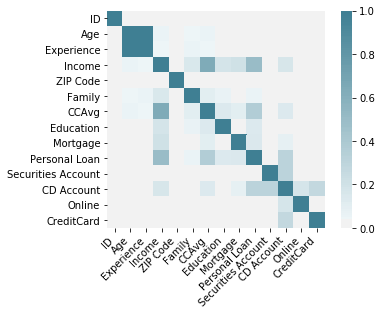

In [5]:
corr = data.corr().abs()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:
# Create correlation matrix
corr_matrix = data.corr().abs()

(corr_matrix['Personal Loan']).sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
ID                    0.024801
Securities Account    0.021954
Age                   0.007726
Experience            0.007413
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Name: Personal Loan, dtype: float64

Few columns doesnt have good correlated with target variable "Personal Loan", so Lets remove the columns which is less than 0.06 correlation which are ID, Age, Experience, ZIP Code, Securities Account, Online CreditCard

In [7]:
dataset = data.drop(['ID', 'Age', 'Experience', 'ZIP Code',  'Securities Account', 'Online', 'CreditCard'], axis=1)

# Get the target column distribution. Your comments

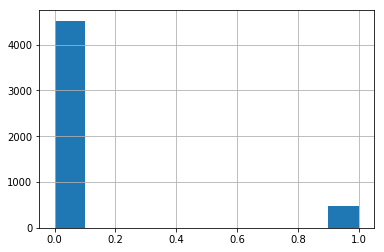

In [8]:
dataset['Personal Loan'].hist()

In [9]:
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Personal Loan is the target column, which is not equally distributed and imbalanced. Totally there 5000 customers in 4520 rejected the personal loan and 480 accepted it.

# Split the data into training and test set in the ratio of 70:30 respectively

In [10]:
dataset.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'CD Account'],
      dtype='object')

In [11]:
X = dataset.drop(['Personal Loan'], axis=1)
y = dataset['Personal Loan']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

In [13]:
from sklearn import metrics

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
pred = clf.predict(X_test)

print(metrics.classification_report(y_test, pred))
print('Accuracy ',metrics.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.82      0.59      0.68       157

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.94      0.94      1500

Accuracy  0.9433333333333334


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_knn = scaler.fit_transform(X)

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    X_knn, y, test_size=0.30, random_state=42)

C:\Users\Balajisri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Balajisri\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(X_train_std,y_train_std)

KNN_pred = knn.predict(X_test_std)
print(metrics.classification_report(y_test, KNN_pred))
print('Accuracy ',metrics.accuracy_score(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.92      0.85      0.88       157

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.95      0.92      0.93      1500
weighted avg       0.98      0.98      0.98      1500

Accuracy  0.976


In [17]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train,y_train)
NB_pred = NB_clf.predict(X_test)
print(metrics.classification_report(y_test, NB_pred))
print('Accuracy ',metrics.accuracy_score(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.48      0.60      0.54       157

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500

Accuracy  0.8913333333333333


# Print the confusion matrix for all the above models

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print("Logistic Regression")
print(confusion_matrix(y_test, pred))

Logistic Regression
[[1323   20]
 [  65   92]]


In [20]:
print('KNN')
print(confusion_matrix(y_test_std, KNN_pred))

KNN
[[1331   12]
 [  24  133]]


In [21]:
print('Naïve Bayes')
print(confusion_matrix(y_test, NB_pred))

Naïve Bayes
[[1243  100]
 [  63   94]]


# Conclusion

In [22]:
from sklearn.metrics import balanced_accuracy_score

print("Logistic Regression:")
print(balanced_accuracy_score(y_test, pred))

print("================================")

print('KNN:')
print(balanced_accuracy_score(y_test_std, KNN_pred))

print("================================")

print('Naïve Bayes:')
print(balanced_accuracy_score(y_test, NB_pred))

Logistic Regression:
0.7855476141920124
KNN:
0.9190992691521501
Naïve Bayes:
0.7621329754186605


Based on the classification performances of each model, measured by accuracy score – in this case, balanaced_accuracy_score because of the imbalanced dataset as seen in the data exploratory steps previously, KNN algorithm works better than Logistic regression and  Naïve Bayes algorithms